In [36]:
import numpy as np 
import pandas as pd 

In [37]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import plotly.express as px # create interactive charts

## Customer Segmentation and Churn Prediction

### Objective:
This project aims to analyze **customer behavior** in an e-commerce setting, segmenting them into groups using **K-Means Clustering** and predicting churn using **Random Forest Classifier**.

### Dataset Details:
- **Source:** Kaggle
- **Size:** 8,000+ customer records
- **Features:**
  - `CustomerID`: Unique identifier
  - `Purchase Frequency`: Number of orders
  - `Total Spend`: Total amount spent
  - `Churn Status`: 1 (Churned), 0 (Active)
  - `Product Category`: Purchased item category
  - `Payment Method`: Credit Card, PayPal, etc.

### Technologies Used:
✅ **Unsupervised Learning (K-Means Clustering)** – To segment customers  
✅ **Supervised Learning (Random Forest Classifier)** – To predict churn probability  
✅ **Flask & Streamlit** – For deploying the model  
✅ **Performance Metrics** – F1-Score, Accuracy, Training & Testing Accuracy

---


In [92]:
# read file
df = pd.read_csv("dataset/ecommerce_customer_data_large.csv")
df.info() # get info about count and datatypes
df.shape  # returns a tuple of total no of rows and columns
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0
5,13738,2022-08-25 06:48:33,Home,191,3,3722,Credit Card,27,1.0,Lauren Johnson,27,Female,0
6,13738,2023-07-25 05:17:24,Electronics,205,1,2773,Credit Card,27,NaN,Lauren Johnson,27,Female,0
7,13738,2023-02-05 19:31:48,Books,370,5,1486,Cash,27,1.0,Lauren Johnson,27,Female,0
8,13738,2021-12-21 03:29:05,Home,12,2,2175,Cash,27,NaN,Lauren Johnson,27,Female,0
9,13738,2023-02-09 00:53:14,Electronics,40,4,4327,Cash,27,0.0,Lauren Johnson,27,Female,0


In [93]:
# count distinct values in each column
df.nunique()

Customer ID               49661
Purchase Date            249728
Product Category              4
Product Price               491
Quantity                      5
Total Purchase Amount      5245
Payment Method                3
Customer Age                 53
Returns                       2
Customer Name             39878
Age                          53
Gender                        2
Churn                         2
dtype: int64

In [94]:
print("\nMissing Values in Large Dataset:")
df.isnull().sum()


Missing Values in Large Dataset:


Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [95]:
# Replace all NaN to 0 in Returns
df['Returns'] = df['Returns'].fillna(0).astype(int)  # Converting dtype to integer
#df['Returns'].info()
df.isnull().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64

In [96]:
# Converting `Purchase Date` dtype to Datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Purchase_Day'] = df['Purchase Date'].dt.day
# Calculate Recency (days since last purchase)
latest_date = df['Purchase Date'].max()
df['Recency'] = (latest_date - df['Purchase Date']).dt.days #Recency
# Splitting Year into new column
df['Purchase Year'] = df['Purchase Date'].dt.year
#df['Recency'] = df['Purchase Date'].dt.day  
df.drop(columns=['Age'], axis=1, inplace=True) 
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,Churn,Purchase_Day,Recency,Purchase Year
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1,John Rivera,Female,0,3,132,2023
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1,John Rivera,Female,0,16,850,2021
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1,John Rivera,Female,0,13,1157,2020
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0,John Rivera,Female,0,17,239,2023
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1,John Rivera,Female,0,1,865,2021


In [97]:
# Check for duplicate rows
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Number of Duplicate Rows: 0


In [98]:
customer_agg = df.groupby('Customer ID').agg(   # Calculates aggregated metrics for each customer,It means you’re counting and adding up things
    Frequency=('Purchase Date', 'count'),      # Total transactions
    Monetary=('Total Purchase Amount', 'sum'), # Total spending
    Avg_Order_Value=('Total Purchase Amount', 'mean'), 
    Total_Returns=('Returns', 'sum')           # Total returns
).reset_index()
print(customer_agg)
# Merge RFM(recency,frequency ani Moneytary features back into the main DataFrame
df = pd.merge(df, customer_agg, on='Customer ID', how='left')
df.head()

       Customer ID  Frequency  Monetary  Avg_Order_Value  Total_Returns
0                1          3      6290      2096.666667              0
1                2          6     16481      2746.833333              4
2                3          4      9423      2355.750000              0
3                4          5      7826      1565.200000              3
4                5          5      9769      1953.800000              3
...            ...        ...       ...              ...            ...
49656        49996          7     24034      3433.428571              2
49657        49997          2      5714      2857.000000              0
49658        49998         10     20495      2049.500000              6
49659        49999          6     14321      2386.833333              3
49660        50000          7     21927      3132.428571              3

[49661 rows x 5 columns]


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,Churn,Purchase_Day,Recency,Purchase Year,Frequency,Monetary,Avg_Order_Value,Total_Returns
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1,John Rivera,Female,0,3,132,2023,5,10755,2151.0,4
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1,John Rivera,Female,0,16,850,2021,5,10755,2151.0,4
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1,John Rivera,Female,0,13,1157,2020,5,10755,2151.0,4
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0,John Rivera,Female,0,17,239,2023,5,10755,2151.0,4
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1,John Rivera,Female,0,1,865,2021,5,10755,2151.0,4


In [99]:
df.info()
# One-hot encoding # converts categorical data (like text or labels) into numbers so that computers can understand and use them in calculations
df = pd.get_dummies(df, columns=['Product Category', 'Payment Method', 'Gender'], drop_first=True)
# Identify boolean columns
bool_columns = df.select_dtypes(include='bool').columns
# Convert boolean columns to integers (1/0)
df[bool_columns] = df[bool_columns].astype(int)
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Purchase Date          250000 non-null  datetime64[ns]
 2   Product Category       250000 non-null  object        
 3   Product Price          250000 non-null  int64         
 4   Quantity               250000 non-null  int64         
 5   Total Purchase Amount  250000 non-null  int64         
 6   Payment Method         250000 non-null  object        
 7   Customer Age           250000 non-null  int64         
 8   Returns                250000 non-null  int64         
 9   Customer Name          250000 non-null  object        
 10  Gender                 250000 non-null  object        
 11  Churn                  250000 non-null  int64         
 12  Purchase_Day           250000 non-null  int3

,Customer ID,Purchase Date,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Customer Name,Churn,Purchase_Day,...,Frequency,Monetary,Avg_Order_Value,Total_Returns,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Payment Method_Credit Card,Payment Method_PayPal,Gender_Male
0,44605,2023-05-03 21:30:02,177,1,2427,31,1,John Rivera,0,3,...,5,10755,2151.0,4,0,0,1,0,1,0
1,44605,2021-05-16 13:57:44,174,3,2448,31,1,John Rivera,0,16,...,5,10755,2151.0,4,0,1,0,0,1,0
2,44605,2020-07-13 06:16:57,413,1,2345,31,1,John Rivera,0,13,...,5,10755,2151.0,4,0,0,0,1,0,0
3,44605,2023-01-17 13:14:36,396,3,937,31,0,John Rivera,0,17,...,5,10755,2151.0,4,0,1,0,0,0,0
4,44605,2021-05-01 11:29:27,259,4,2598,31,1,John Rivera,0,1,...,5,10755,2151.0,4,0,0,0,0,1,0


In [100]:
# Example: Winsorize or handles the outliers in 'Total Purchase Amount'
from scipy.stats import mstats
df['Total Purchase Amount'] = mstats.winsorize(df['Total Purchase Amount'], limits=[0.05, 0.05])
print("\n🔹0.05 means 5% of the data at the lower end and 5% of the data at the upper end")
print("✔winsorized (replacing with the nearest non-outlier value)'")


🔹0.05 means 5% of the data at the lower end and 5% of the data at the upper end
✔winsorized (replacing with the nearest non-outlier value)'


In [101]:
#dropping unnecessary columns
df.drop(['Customer Name', 'Purchase Date'], axis=1, inplace=True) 

In [107]:
#Group by Customer ID (one row per customer)
customer_df = df.groupby('Customer ID').agg({
    'Recency': 'min',
    'Frequency': 'max',
    'Monetary': 'max',
    'Customer Age': 'first',
    'Total_Returns': 'max',
    'Churn': 'max'
}).reset_index()
print(customer_df)
df.head()
# customer_df is my final preprocessed dataset for machine learning.

       Customer ID  Recency  Frequency  Monetary  Customer Age  Total_Returns  \
0                1      288          3      6290            67              0   
1                2       72          6     16481            42              4   
2                3      222          4      9423            31              0   
3                4      441          5      7826            37              3   
4                5      424          5      9769            24              3   
...            ...      ...        ...       ...           ...            ...   
49656        49996      359          7     24034            45              2   
49657        49997      388          2      5714            65              0   
49658        49998       13         10     20495            31              6   
49659        49999      356          6     14321            70              3   
49660        50000      122          7     21927            29              3   

       Churn  
0          0

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Churn,Purchase_Day,Recency,Purchase Year,...,Total_Returns,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Payment Method_Credit Card,Payment Method_PayPal,Gender_Male,Total Purchase Amount_winsorized_1,Total Purchase Amount_winsorized_5,Total Purchase Amount_winsorized_10
0,44605,177,1,2427,31,1,0,3,132,2023,...,4,0,0,1,0,1,0,2427,2427,2427
1,44605,174,3,2448,31,1,0,16,850,2021,...,4,0,1,0,0,1,0,2448,2448,2448
2,44605,413,1,2345,31,1,0,13,1157,2020,...,4,0,0,0,1,0,0,2345,2345,2345
3,44605,396,3,937,31,0,0,17,239,2023,...,4,0,1,0,0,0,0,937,937,937
4,44605,259,4,2598,31,1,0,1,865,2021,...,4,0,0,0,0,1,0,2598,2598,2598


## Taking the transaction-level data (multiple rows per customer) and converting it to customer-level data (one row per customer).

# Aggregates Features:

**Recency:** 'min' → Days since the customer’s most recent purchase (smallest value = last purchase).

**Frequency:** 'max' → Total number of purchases (calculated earlier and constant per customer).

**Monetary:** 'max' → Total spending across all transactions.

**Customer Age:** 'first' → Takes the first value (assumes age is constant for a customer).

**Total_Returns:** 'max' → Total returns across transactions.

**Churn:** 'max' → If a customer churned (1) or not (0).

### why is it needed?
**Customer Segmentation (K-means):**
->Clustering algorithms like K-means require one row per customer, not per transaction.

->We need aggregated metrics (RFM: Recency, Frequency, Monetary) to group customers into segments.

**Churn Prediction:**
Machine learning models need a single label (Churn) per customer, not repeated across transactions.

**Efficiency:**
Reduces data size from thousands of transactions to a few hundred/thousand customers.

## To choose best limit for the outliers in this dataset, the following steps below were used:

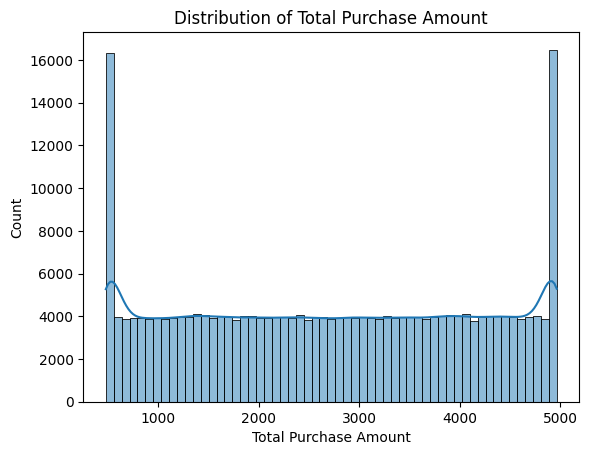

In [104]:
#To choose the Best Limit for my Project
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Total Purchase Amount'], kde=True)
plt.title("Distribution of Total Purchase Amount")
plt.show()


In [105]:
from scipy.stats import mstats

# Winsorize with 1% limit
df['Total Purchase Amount_winsorized_1'] = mstats.winsorize(df['Total Purchase Amount'], limits=[0.01, 0.01])

# Winsorize with 5% limit
df['Total Purchase Amount_winsorized_5'] = mstats.winsorize(df['Total Purchase Amount'], limits=[0.05, 0.05])

# Winsorize with 10% limit
df['Total Purchase Amount_winsorized_10'] = mstats.winsorize(df['Total Purchase Amount'], limits=[0.10, 0.10])

# Compare results
print(df[['Total Purchase Amount', 'Total Purchase Amount_winsorized_1', 'Total Purchase Amount_winsorized_5', 'Total Purchase Amount_winsorized_10']].describe())

       Total Purchase Amount  Total Purchase Amount_winsorized_1  \
count          250000.000000                       250000.000000   
mean             2725.558408                         2725.229396   
std              1363.096870                         1420.027432   
min               729.000000                          476.000000   
25%              1476.000000                         1476.000000   
50%              2725.000000                         2725.000000   
75%              3975.000000                         3975.000000   
max              4719.000000                         4968.000000   

       Total Purchase Amount_winsorized_5  Total Purchase Amount_winsorized_10  
count                       250000.000000                        250000.000000  
mean                          2725.229396                          2725.558408  
std                           1420.027432                          1363.096870  
min                            476.000000                      

In [106]:
print("\n🔹The results of 5% are identical to the 1% Winsorizing. This means the data’s extreme values are concentrated in the 1-5% range at both ends.")



🔹The results of 5% are identical to the 1% Winsorizing. This means the data’s extreme values are concentrated in the 1-5% range at both ends.


In [111]:
customer_agg.to_csv("customer_data_processed.csv", index=False)
# Save customer-level aggregated data (for modeling)
customer_df.to_csv("customer_data_ready.csv", index=False)

In [110]:
# Saving transaction-level data (if needed for future analysis)
df.to_csv("processed_transaction_data.csv", index=False)